In [4]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_fixedy_500.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', 24)
data.iloc[:36,:]


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,optimal_policy,optimal_outcome_policy
0,51.647355,73.393612,73.393612,2,73.393612,4,48.931329
1,46.289149,21.746255,27.182824,19,54.365643,1,27.182824
2,51.668288,78.831278,54.367276,70,78.831278,84,78.831278
3,78.936056,24.500374,27.182818,89,78.833985,84,76.151541
4,51.689395,103.456044,24.464536,32,103.456044,84,76.137033
...,...,...,...,...,...,...,...
24,103.310434,78.830276,27.182921,47,78.830276,77,51.647355
25,27.182818,103.294788,73.394248,47,103.294788,88,103.294788
26,51.647589,78.830392,21.748200,47,78.830392,88,78.830392
27,51.649692,73.436550,0.000000,57,73.436550,88,73.436550


In [5]:
# Create new "regret" columns by subtracting other columns from "optimal_outcome_actions"
for column in data.columns:
    if column not in ['optimal_outcome_actions', 'eps_greedy_policy', 'optimal_policy']:
        data[f'regret_{column}'] = data['optimal_outcome_actions'] - data[column]

# Calculate the accumulative regret for each "regret" column
for column in data.columns:
    if 'regret_' in column:
        data[f'accumulative_{column}'] = data[column].cumsum()

# Display the first few rows of the modified dataframe to verify the new columns
data.head()


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,optimal_policy,optimal_outcome_policy,regret_IpwEpsGreedy,regret_IpwBootTS,regret_RandomAction,regret_optimal_outcome_policy,accumulative_regret_IpwEpsGreedy,accumulative_regret_IpwBootTS,accumulative_regret_RandomAction,accumulative_regret_optimal_outcome_policy
0,51.647355,73.393612,73.393612,2,73.393612,4,48.931329,21.746257,0.000000,0.000000,24.462283,21.746257,0.000000,0.000000,24.462283
1,46.289149,21.746255,27.182824,19,54.365643,1,27.182824,8.076494,32.619388,27.182819,27.182819,29.822751,32.619388,27.182819,51.645102
2,51.668288,78.831278,54.367276,70,78.831278,84,78.831278,27.162989,0.000000,24.464002,0.000000,56.985740,32.619388,51.646821,51.645102
3,78.936056,24.500374,27.182818,89,78.833985,84,76.151541,-0.102070,54.333611,51.651167,2.682444,56.883670,86.952999,103.297988,54.327546
4,51.689395,103.456044,24.464536,32,103.456044,84,76.137033,51.766648,0.000000,78.991507,27.319011,108.650319,86.952999,182.289495,81.646557


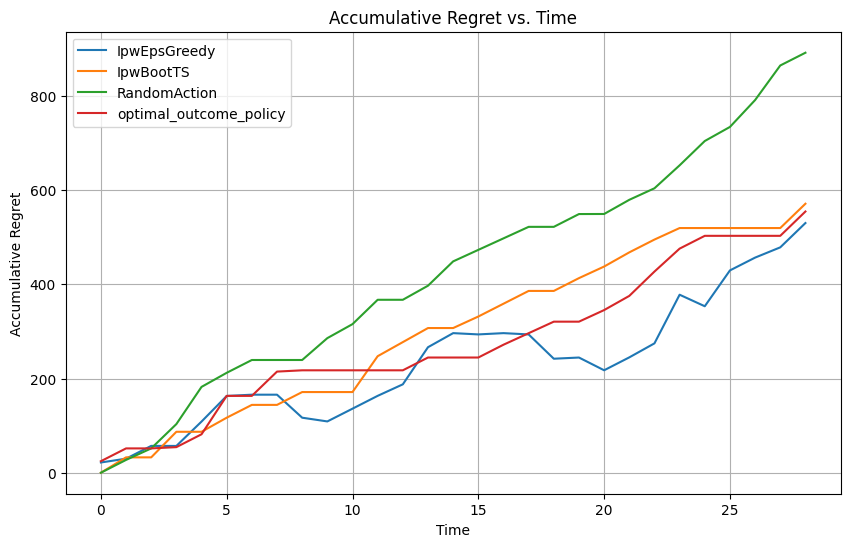

In [6]:
import matplotlib.pyplot as plt

# Plot accumulative regret vs. time (index)
fig, ax = plt.subplots(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        ax.plot(data.index, data[column], label=column.replace('accumulative_regret_', ''))

ax.set_xlabel('Time')
ax.set_ylabel('Accumulative Regret')
ax.set_title('Accumulative Regret vs. Time')
ax.legend()

plt.grid(True)
plt.show()


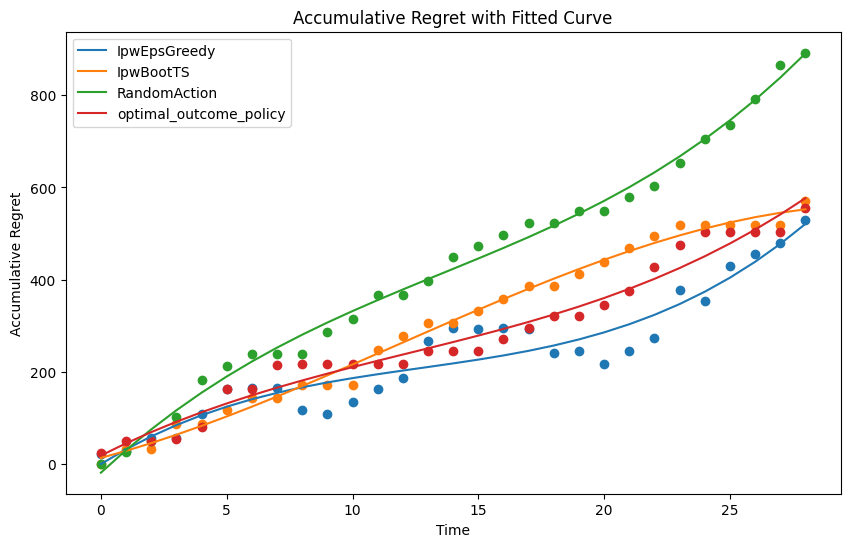

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define the time index as x
x = np.arange(len(data))

# Define a function to fit the curve, using a polynomial function for simplicity
def poly_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the curve

plt.figure(figsize=(10, 6))

# Iterate over columns to plot accumulative regret for each relevant column
for column in data.columns:
    if 'accumulative_regret_' in column:
        y = data[column].values
        params, params_covariance = curve_fit(poly_func, x, y)
        plt.scatter(x, y)
        plt.plot(x, poly_func(x, *params), label=column.replace('accumulative_regret_', ''))

# Plot the original data and the fitted curve


plt.title('Accumulative Regret with Fitted Curve')
plt.xlabel('Time')
plt.ylabel('Accumulative Regret')
plt.legend()
plt.show()
